<a href="https://colab.research.google.com/github/Raj-666/PDS_07/blob/main/Music_Genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle --version

Kaggle API 1.6.17


In [ ]:
!kaggle datasets download -d purumalgi/music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/purumalgi/music-genre-classification
License(s): other
  0% 0.00/1.29M [00:00<?, ?B/s]
100% 1.29M/1.29M [00:00<00:00, 124MB/s]


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt

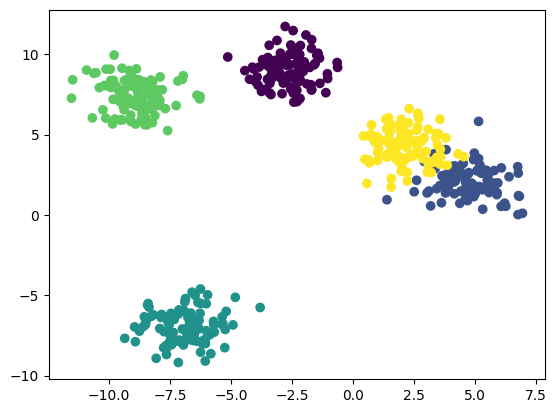

In [ ]:
feature, target = make_blobs(n_samples=500,
                             centers=5,
                             random_state=42,
                             shuffle=False)
plt.scatter(feature[:, 0], feature[:, 1], c=target)

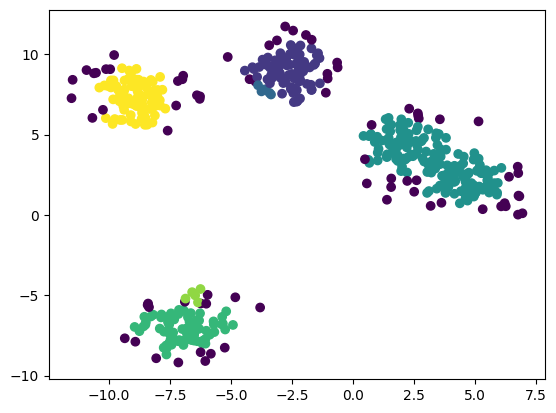

In [ ]:
model = DBSCAN(eps=0.5, min_samples=5)
model.fit(feature)

plt.scatter(feature[:, 0], feature[:, 1], c=model.labels_, cmap='viridis')

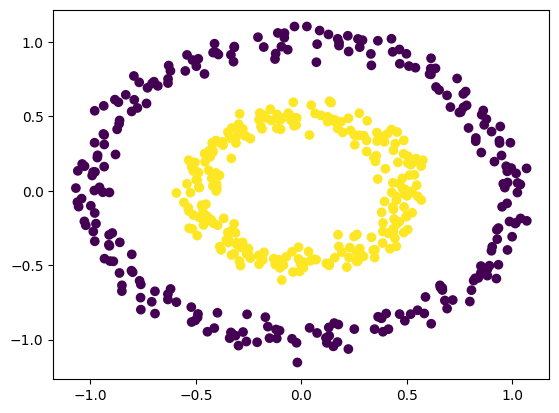

In [ ]:
noisy_circles, nc_target = datasets.make_circles(
    n_samples=500, factor=0.5, noise=0.05, random_state=30
)

plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=nc_target)

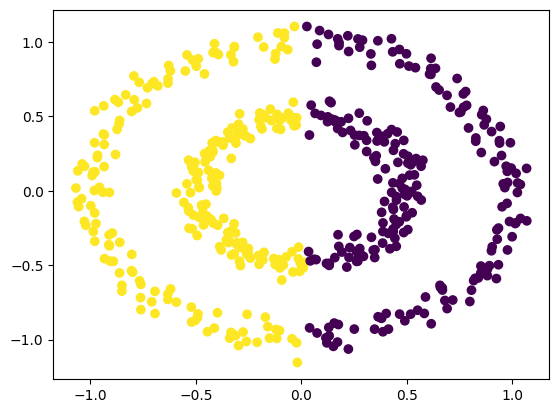

In [ ]:
feature = noisy_circles
model_dbscan = KMeans(n_clusters=2)
model_dbscan.fit(feature)

plt.scatter(feature[:, 0], feature[:, 1], c=model_dbscan.labels_, cmap='viridis')

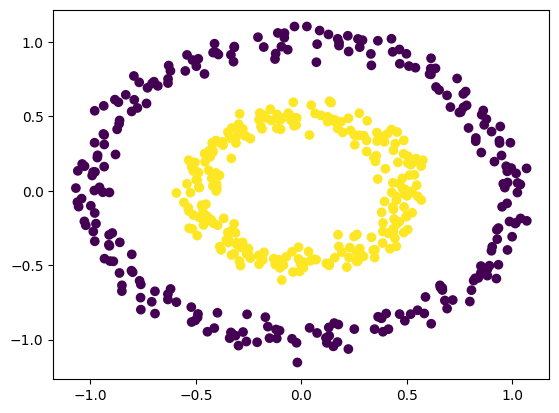

In [ ]:
feature = noisy_circles
model_dbscan = DBSCAN(eps=0.2, min_samples=3)
model_dbscan.fit(feature)

plt.scatter(feature[:, 0], feature[:, 1], c=model_dbscan.labels_, cmap='viridis')

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
df.dtypes

,0
Artist Name,object
Track Name,object
Popularity,float64
danceability,float64
energy,float64
key,float64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64


In [ ]:
df.isna().sum()

,0
Artist Name,0
Track Name,0
Popularity,428
danceability,0
energy,0
key,2014
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
music_genre = ["Acoustic/Folk", "Alt_Music", "Blues", "Bollywood", "Country", "HipHop", "Indie Alt", "Instrumental", "Metal", "Pop", "Rock"]
df["music_genre"] = df["Class"].apply(lambda x: music_genre[x])
df["music_genre"].value_counts()

,count
music_genre,
Rock,4949
Indie Alt,2587
Pop,2524
Metal,1854
HipHop,1447
Alt_Music,1373
Blues,1272
Acoustic/Folk,625
Instrumental,576


In [ ]:
df.isna().sum()

,0
Artist Name,0
Track Name,0
Popularity,428
danceability,0
energy,0
key,2014
loudness,0
mode,0
speechiness,0
acousticness,0


In [ ]:
def convert_all_time_to_minutes(value):
    if value > 1000:  # guess that if it larger than 1000 than its miliseconds
        return (value / 1000) / 60
    else:
        return value

# Apply the function to the 'time' column
df['time_in_minutes'] = df['duration_in min/ms'].apply(convert_all_time_to_minutes)

In [ ]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,music_genre,time_in_minutes
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5,HipHop,3.909933
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10,Rock,4.195550
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6,Indie Alt,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5,HipHop,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10,Rock,3.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6,Indie Alt,3.224167
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2,Blues,4.284450
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8,Metal,3.603700
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8,Metal,3.661550


In [ ]:
# Step 1: Clean the dataset (drop duplicates)
df_cleaned = df.drop_duplicates(subset=['Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature'], keep='first')

print(df_cleaned)
df = df_cleaned

# Step 2: Preprocess the dataset (handle missing values and encode categorical columns if necessary)
# For this example, we'll assume 'Popularity' is the target variable and the rest are features

# Handle missing values (if any)
df = df.dropna()  # or df.fillna(df.mean(), inplace=True) for numerical columns

# Step 3: Split the dataset into features (X) and target (y)
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_in min/ms', 'time_signature']]  # Use relevant columns as features

y = df['Popularity']  # Target variable: 'Popularity' (binary classification assumption)

# Step 4: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warnings

# Step 6: Train the model
logreg.fit(X_train, y_train)

# Step 7: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
...                      ...                                    ...   
17991            Green-House                              Find Home   
17992               Micatone                               All Gone   
17993        Smash Hit Combo                           Peine perdue   
17994                Beherit                         Salomon's Gate   
17995         The Raconteurs                     Broken Boy Soldier   

       Popularity  danceability  energy   key  loudness  mode  speechiness  \
0            60.0         0.854   0.564   1.0    -4.964     1       0

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

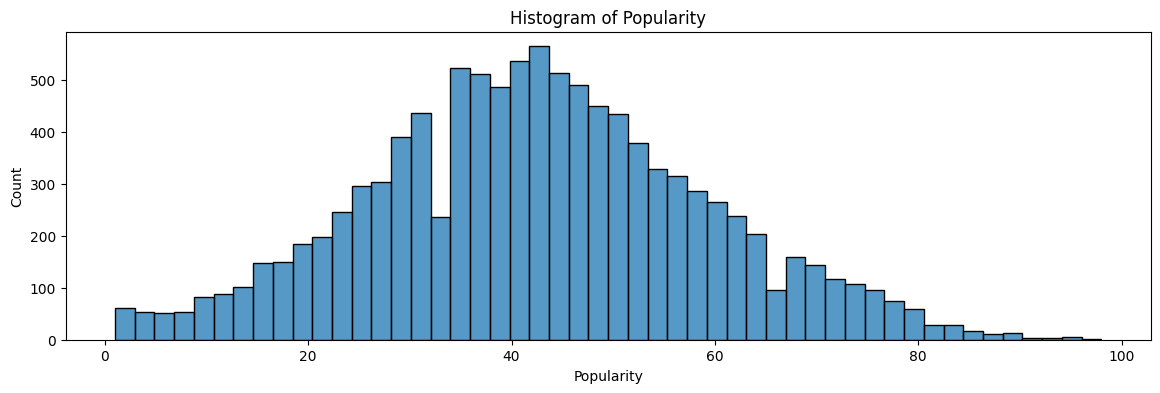

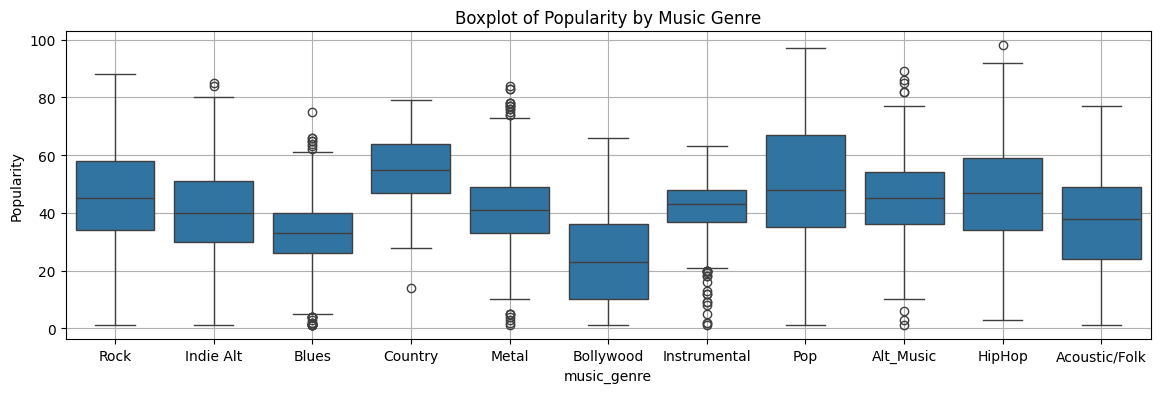

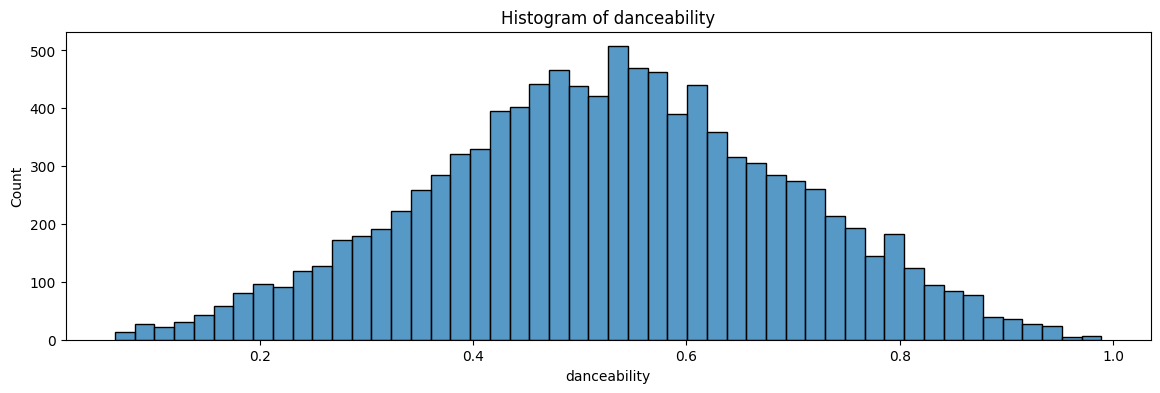

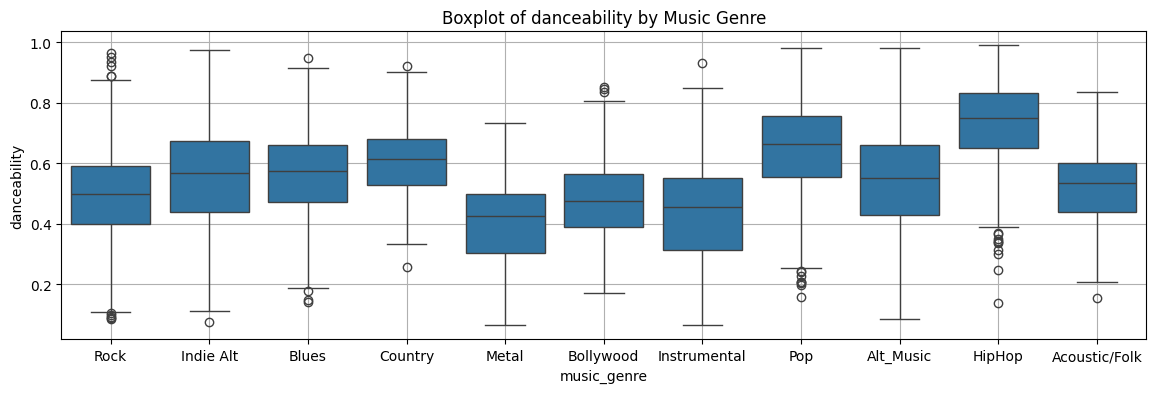

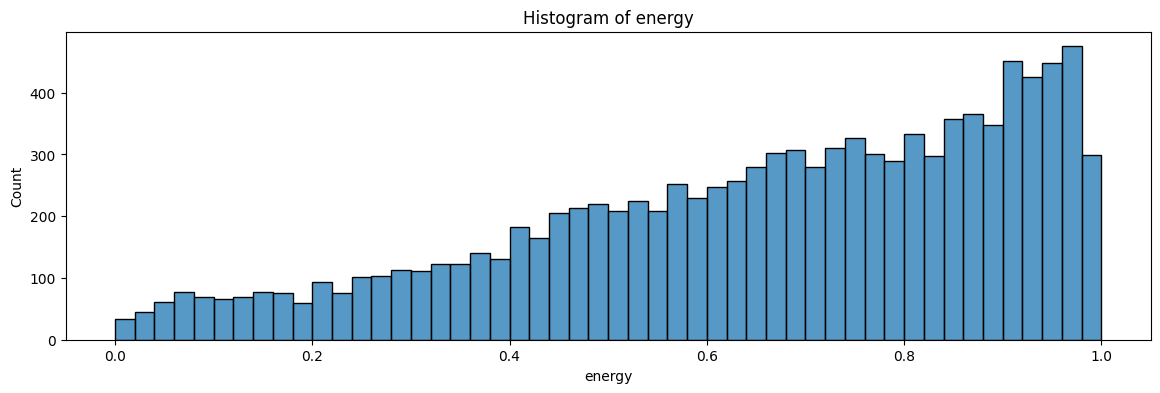

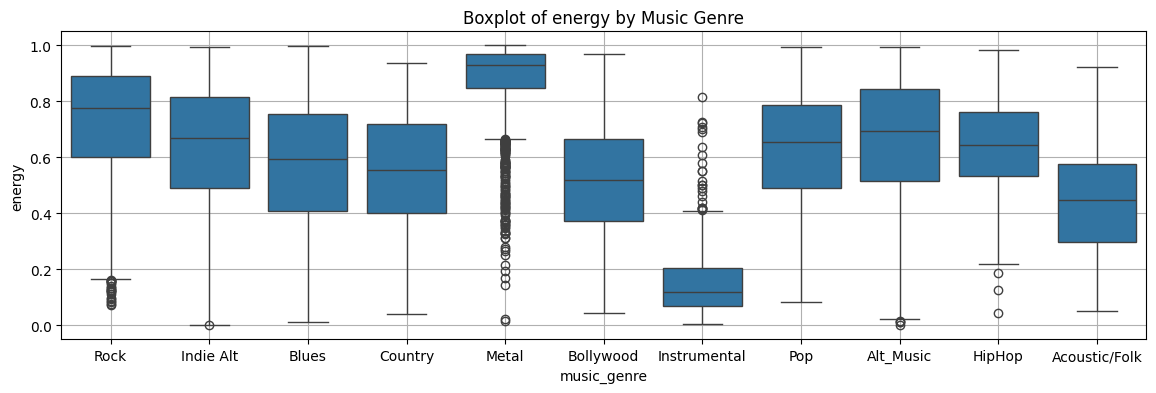

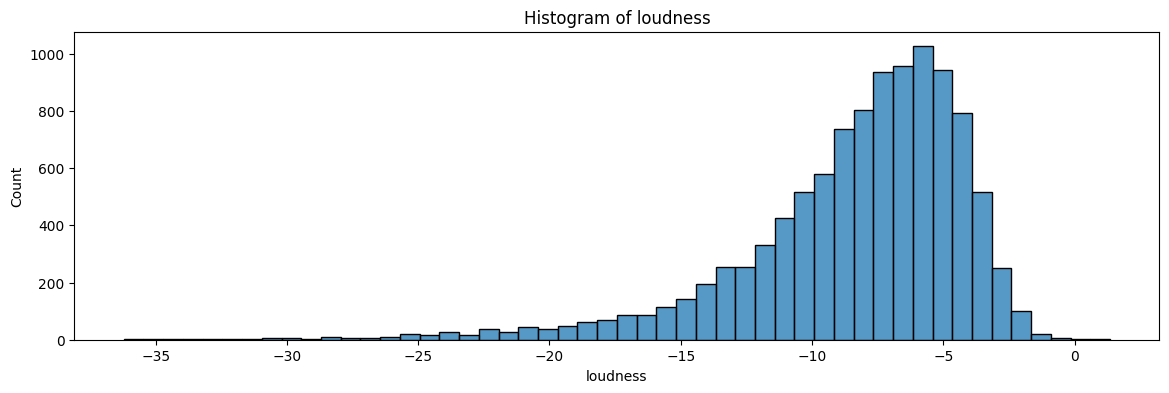

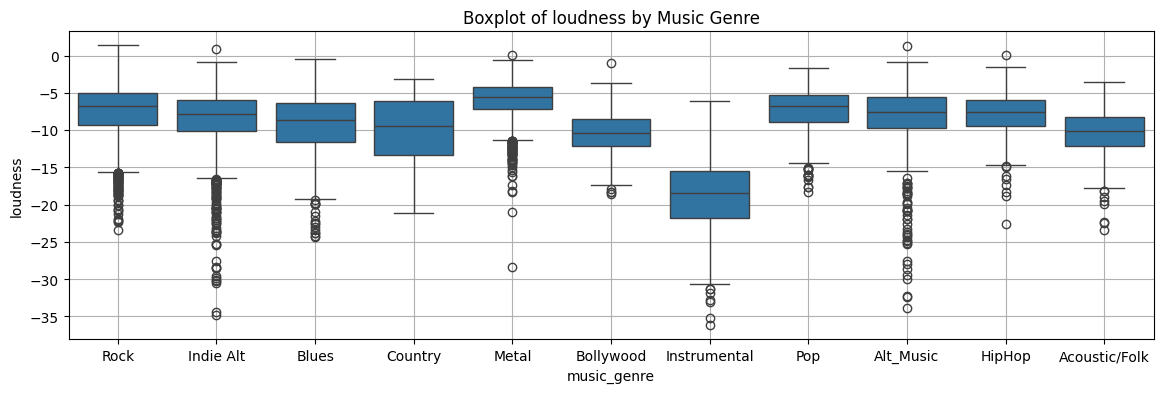

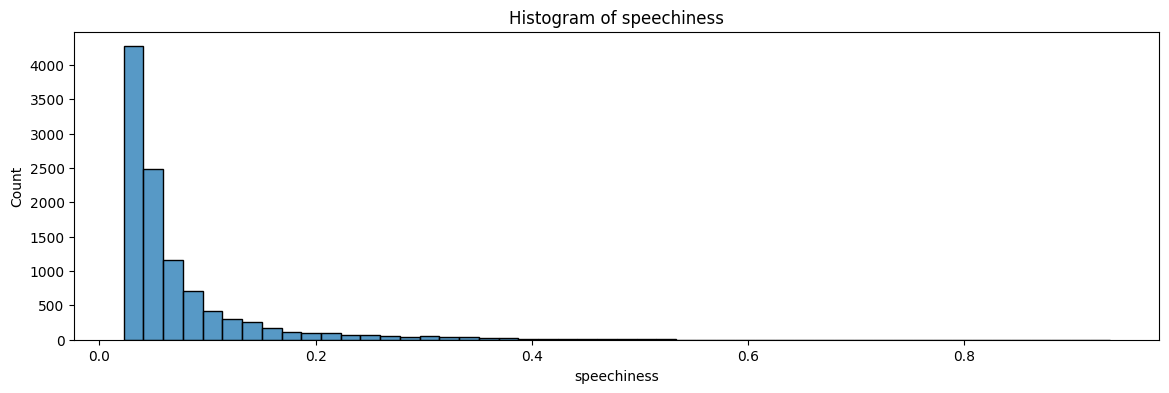

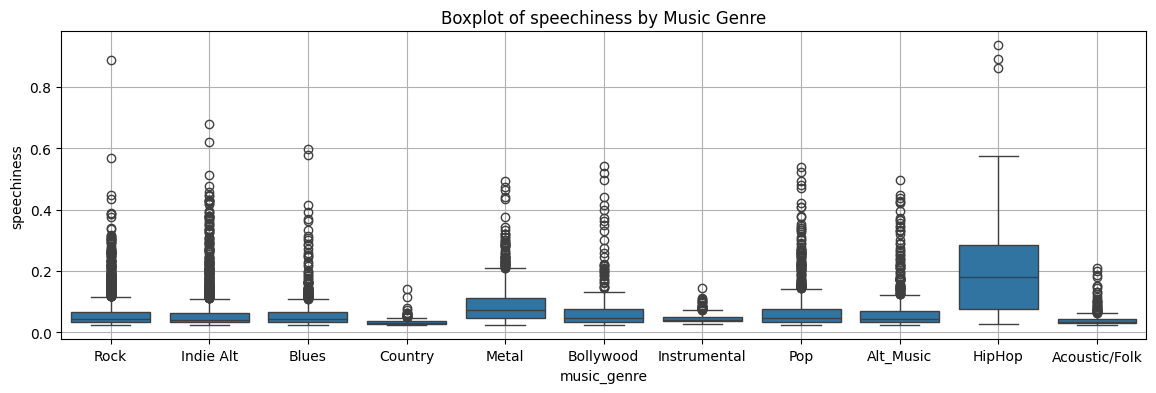

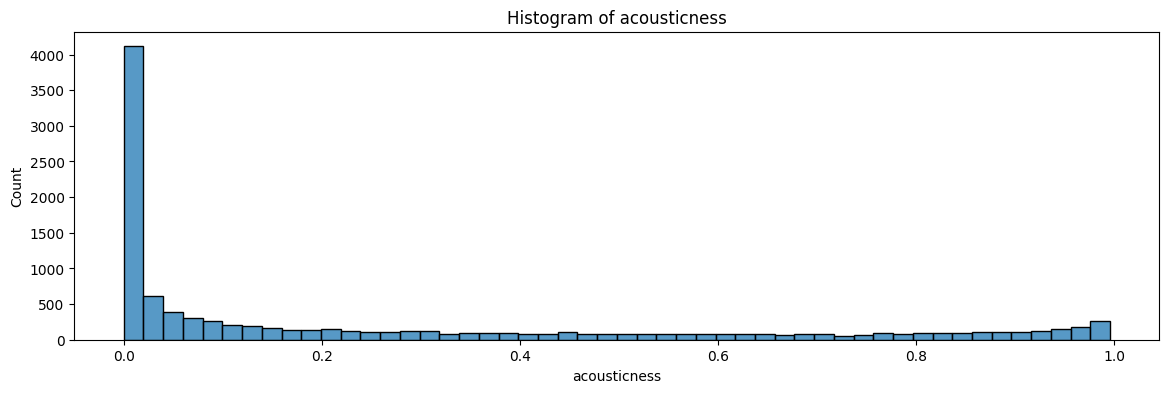

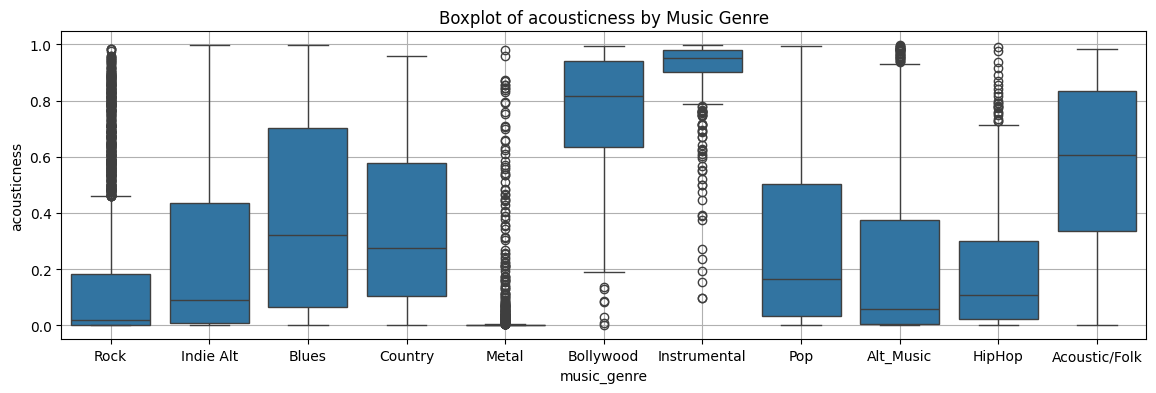

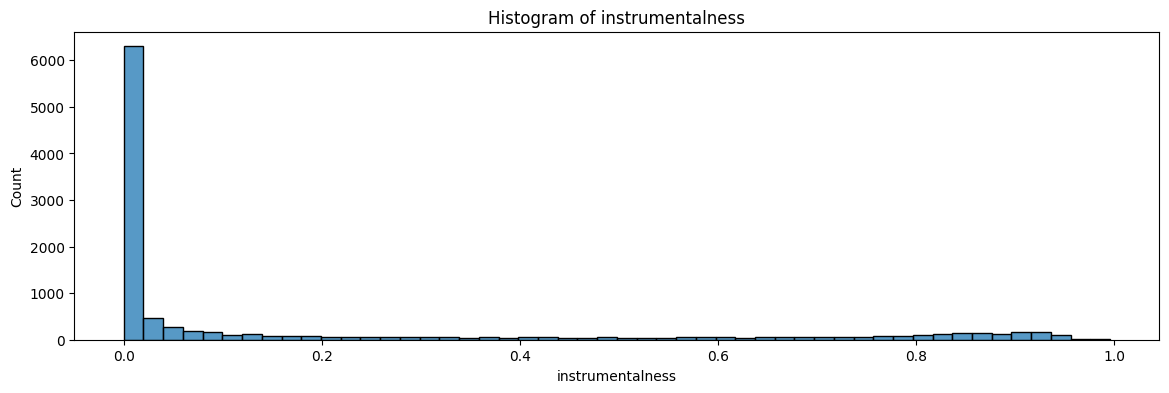

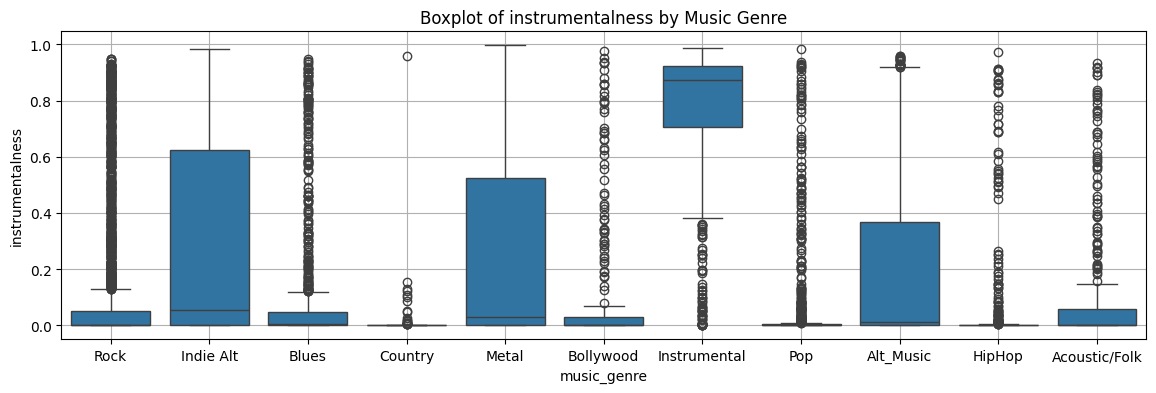

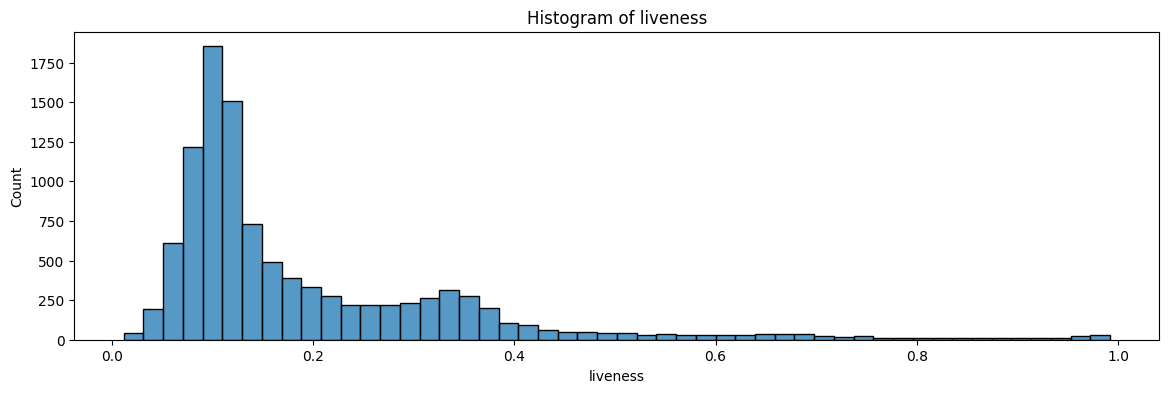

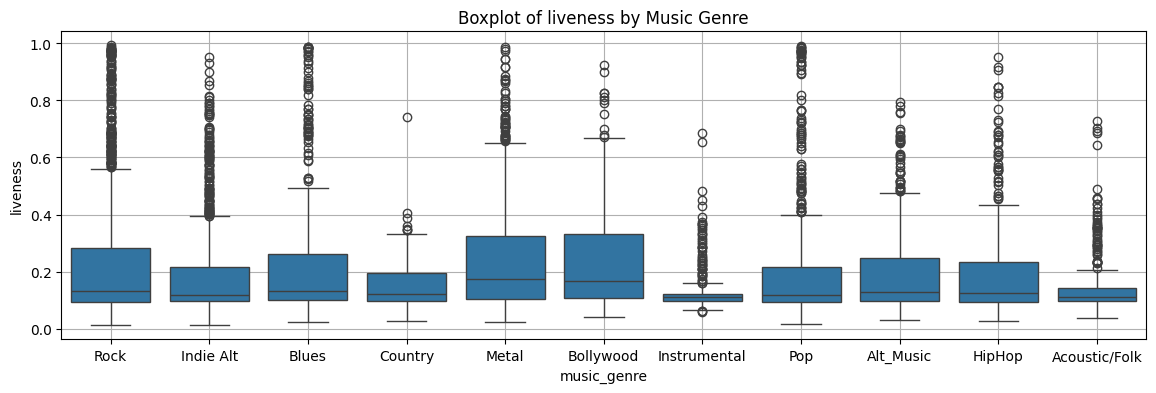

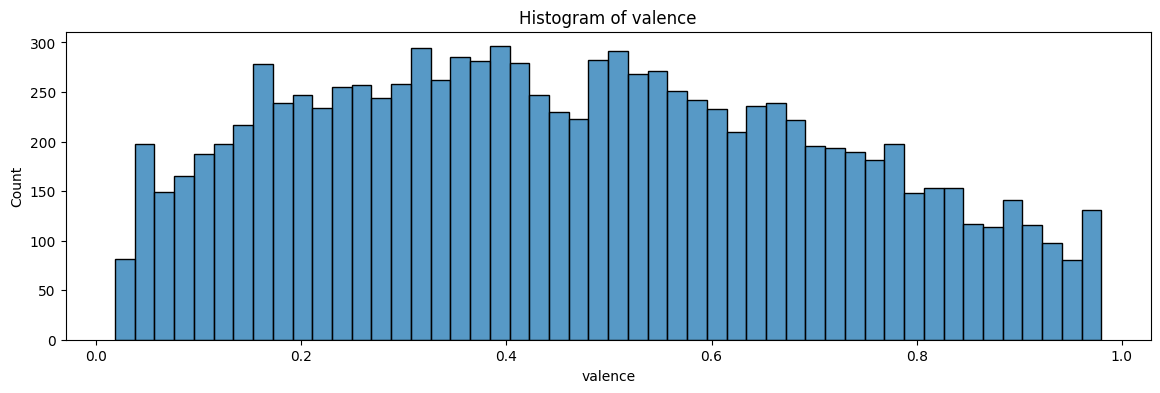

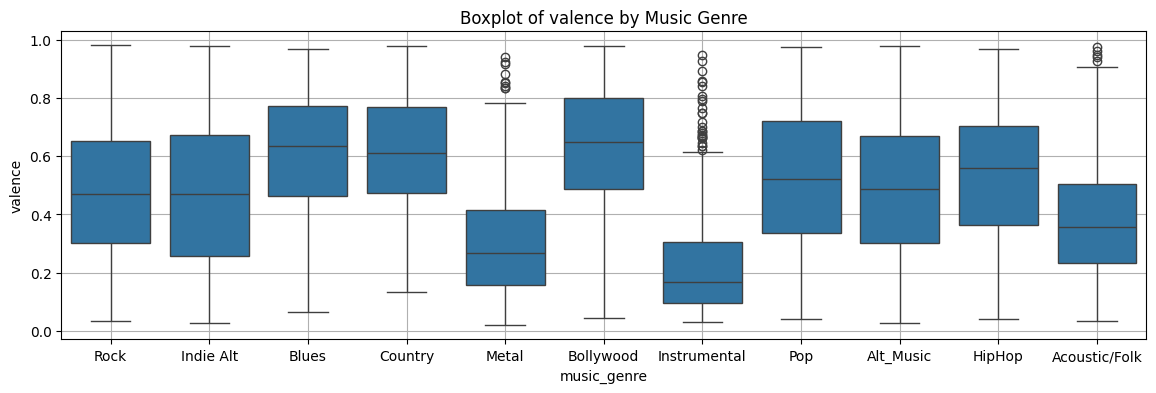

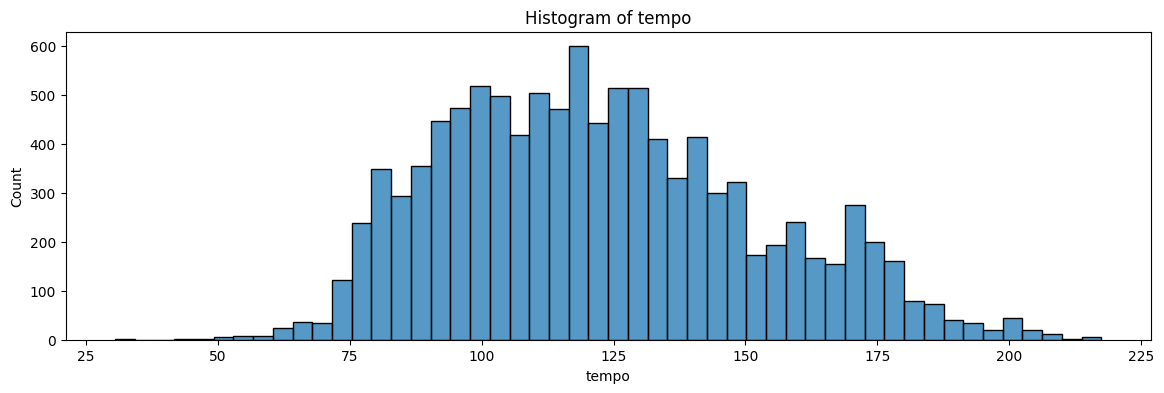

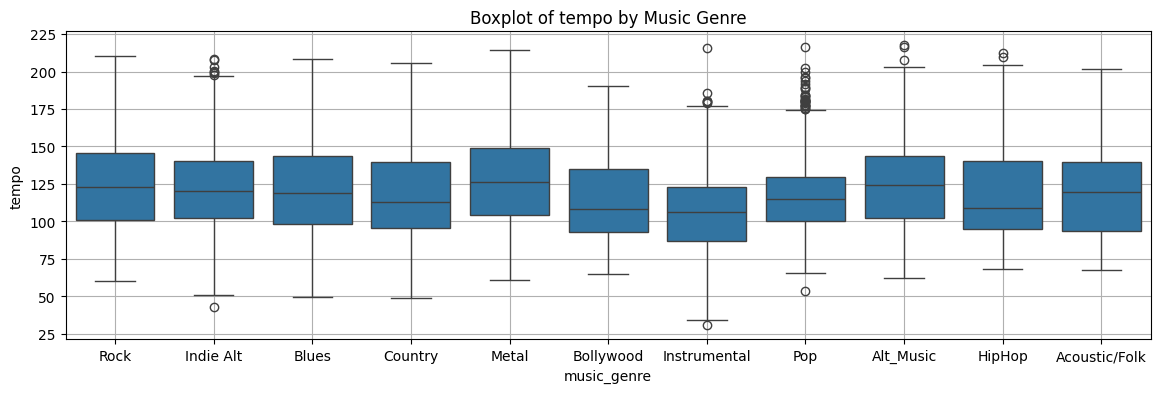

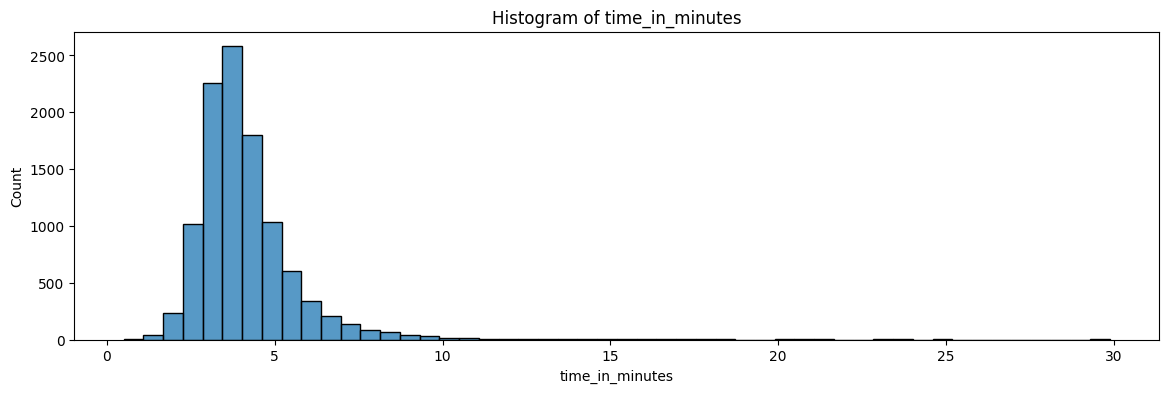

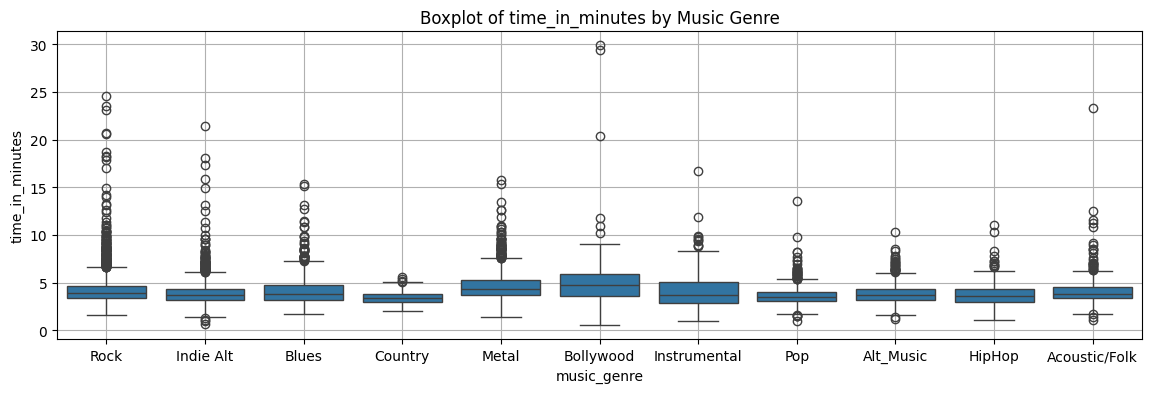

Accuracy: 0.0246328754144955
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         6
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         9
         8.0       0.00      0.00      0.00         9
         9.0       0.00      0.00      0.00        10
        10.0       0.00      0.00      0.00        13
        11.0       0.00      0.00      0.00         6
        12.0       0.00      0.00      0.00        11
        13.0       0.00      0.00      0.00        14
        14.0       0.00      0.00      0.00         9

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Data Visualization
for col in ['Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'time_in_minutes']:
    # Plot Histogram for each feature
    plt.figure(figsize=(14, 4))
    sns.histplot(data=df, x=col, bins=50)
    plt.title(f"Histogram of {col}")
    plt.show()

    # Plot Boxplot grouped by 'music_genre' for each feature
    plt.figure(figsize=(14, 4))
    sns.boxplot(data=df, y=col, x="music_genre")
    plt.title(f"Boxplot of {col} by Music Genre")
    plt.grid(True)
    plt.show()

# Logistic Regression Model
# Assuming we are predicting 'Popularity' as a binary variable
# If 'Popularity' is not binary, you should convert it or use another target variable

# Prepare the feature set (X) and target variable (y)
X = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_in_minutes']]
y = df['Popularity']  # Assuming 'Popularity' is binary (e.g., 0 or 1)

# Handle missing values if any
X = X.dropna()
y = y[X.index]  # Make sure y corresponds to the cleaned X data

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
